In [38]:
# pip install https://github.com/FutureSharks/financial-data/archive/master.zip

In [66]:
import pyfinancialdata
data = pyfinancialdata.get(provider='histdata', instrument='SPXUSD', year=2017).reset_index()
data.head(5)

,date,open,high,low,close,price
0,2017-01-02 18:00:00,2241.00,2244.50,2241.00,2243.50,2243.50
1,2017-01-02 18:01:00,2243.75,2243.75,2243.00,2243.00,2243.00
2,2017-01-02 18:02:00,2243.25,2243.25,2243.00,2243.25,2243.25
3,2017-01-02 18:03:00,2243.00,2243.00,2243.00,2243.00,2243.00
4,2017-01-02 18:04:00,2243.25,2243.75,2243.25,2243.75,2243.75


In [89]:
import pandas as pd
import numpy as np 
import scipy.stats as spst
import statsmodels.api as sm

data['date'] = pd.to_datetime(data.date)
# data

import copy
import datetime
df = copy.deepcopy(data)[['date', 'price']].set_index('date').asfreq(freq = '60s', method = 'ffill')
df['ret'] = df.pct_change(freq = datetime.timedelta(minutes = 10))
df['rolling_max'] = df.price.rolling(10).max().shift()
df['rolling_min'] = df.price.rolling(10).min().shift()
df['10min_macd'] = df.price.rolling(10).mean().shift()
df['30min_std'] = df.price.rolling(30).std().shift()

df['30min_rsi'] = df.fillna(0).ret.rolling(30)\
        .apply(lambda x: 100 - 100/(1+(x.values[x.values >= 0].mean()+0.00001)/(x.values[x.values<=0].mean()\
                                                                                +0.00001))).shift()

df['10min_direction'] = df.ret.rolling(10).apply(lambda x: (((x.values >= 0) - 0.5)*2).sum()).shift()
df = df.dropna().drop('price',axis = 1)
df.head(20)

/var/folders/z7/gm1_wlmx1zg2qyzgnrzwsktm0000gn/T/ipykernel_66692/2035000381.py:19: RuntimeWarning: Mean of empty slice.
  .apply(lambda x: 100 - 100/(1+(x.values[x.values >= 0].mean()+0.00001)/(x.values[x.values<=0].mean()\


,ret,rolling_max,rolling_min,10min_macd,30min_std,30min_rsi,10min_direction
date,,,,,,,
2017-01-02 18:30:00,-0.000223,2244.50,2243.75,2244.000,0.543311,131.772765,4.0
2017-01-02 18:31:00,-0.000111,2244.25,2243.75,2243.950,0.548050,140.418520,2.0
2017-01-02 18:32:00,-0.000111,2244.25,2243.75,2243.925,0.540128,143.522588,0.0
2017-01-02 18:33:00,-0.000111,2244.00,2243.75,2243.900,0.538730,146.278001,-2.0
2017-01-02 18:34:00,0.000000,2244.00,2243.75,2243.875,0.523925,148.633958,-4.0
2017-01-02 18:35:00,0.000111,2244.00,2243.75,2243.875,0.526865,148.633958,-4.0
2017-01-02 18:36:00,0.000223,2244.25,2243.75,2243.900,0.536324,151.547712,-4.0
2017-01-02 18:37:00,0.000223,2244.25,2243.75,2243.950,0.537395,153.239640,-4.0
2017-01-02 18:38:00,0.000111,2244.25,2243.75,2244.000,0.510240,155.450197,-2.0


In [90]:
train,valid, test, trading = df.loc[:'2017-05-01'], df.loc['2017-05-01': '2017-06-01'], \
                            df.loc['2017-06-01':'2017-07-01'], df.loc['2017-07-01':]

train_x = train[['10min_direction', '10min_macd', '30min_rsi', '30min_std', 'rolling_max', 'rolling_min']]

exp_mean = train_x.mean(axis = 0)
exp_std = train_x.std(axis = 0)

train_x = train_x.sub(exp_mean).div(exp_std)

train_y = train[['ret']]
# train_x
# exp_mean
Linear = sm.OLS(exog = sm.add_constant(train_x), endog = train_y).fit()
Linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ret   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     4851.
Date:                Sat, 08 Jul 2023   Prob (F-statistic):               0.00
Time:                        21:10:15   Log-Likelihood:             1.1370e+06
No. Observations:              170934   AIC:                        -2.274e+06
Df Residuals:                  170927   BIC:                        -2.274e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3.745e-06   7.56e-07      4.952      0.000    2.26e-06    5.23e-06
10min_direction     0.0001   8.33e-07    164.543      0.000       0.000       0.000
10min_macd         -0.0123      0.000    -47.555      0.000      -0.013      -0.012
30min_rsi       -1.464e-07   7.56e-07     -0.194      0.846   -1.63e-06    1.34e-06
30min_std        2.737e-05    1.2e-06     22.757      0.000     2.5e-05    2.97e-05
rolling_max         0.0088      0.000     60.813      0.000       0.009       0.009
rolling_min         0.0035      0.000     24.480      0.000       0.003       0.004
==============================================================================
Omnibus:                    68792.075   Durbin-Watson:                   0.301
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         31055093.887
Skew:                           0.573   Prob(JB):                         0.00
Kurtosis:                      69.023   Cond. No.                         727.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
# drop rsi 
try:
    df = df.drop(columns = ['30min_rsi'])
except:
    pass
train,valid, test, trading = df.loc[:'2017-05-01'], df.loc['2017-05-01': '2017-06-01'], \
                            df.loc['2017-06-01':'2017-07-01'], df.loc['2017-07-01':]



train_y = train[['ret']]

train_x = train[['10min_direction', '10min_macd', '30min_std', 'rolling_max', 'rolling_min']]

exp_mean = train_x.mean(axis = 0)
exp_std = train_x.std(axis = 0)

train_x = train_x.sub(exp_mean).div(exp_std)
# train
Linear = sm.OLS(exog = sm.add_constant(train_x), endog = train_y).fit()
Linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ret   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     5821.
Date:                Sat, 08 Jul 2023   Prob (F-statistic):               0.00
Time:                        21:10:16   Log-Likelihood:             1.1370e+06
No. Observations:              170934   AIC:                        -2.274e+06
Df Residuals:                  170928   BIC:                        -2.274e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3.745e-06   7.56e-07      4.952      0.000    2.26e-06    5.23e-06
10min_direction     0.0001   8.33e-07    164.544      0.000       0.000       0.000
10min_macd         -0.0123      0.000    -47.555      0.000      -0.013      -0.012
30min_std        2.737e-05    1.2e-06     22.757      0.000     2.5e-05    2.97e-05
rolling_max         0.0088      0.000     60.813      0.000       0.009       0.009
rolling_min         0.0035      0.000     24.480      0.000       0.003       0.004
==============================================================================
Omnibus:                    68792.633   Durbin-Watson:                   0.301
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         31055332.779
Skew:                           0.573   Prob(JB):                         0.00
Kurtosis:                      69.023   Cond. No.                         727.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
train_MSE = ((Linear.predict(sm.add_constant(train_x)) - train.ret)**2).sum()/(len(train) - 2)
print(train_MSE)
valid_x = valid[['10min_direction', '10min_macd', '30min_std', 'rolling_max', 'rolling_min']]
valid_MSE = ((Linear.predict(sm.add_constant(valid_x.sub(exp_mean).div(exp_std)))\
              - valid.ret)**2).sum()/(len(valid) - 2)
valid_MSE

9.7719060620907e-08


7.875635769298814e-08

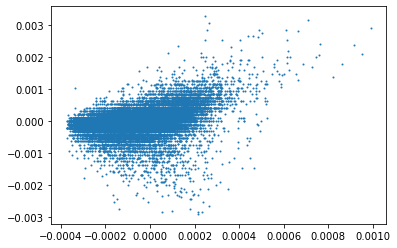

10min_macd


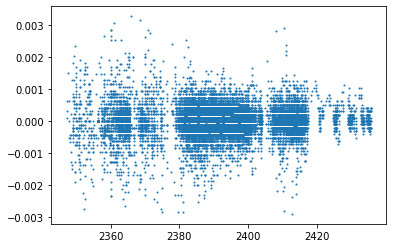

30min_std


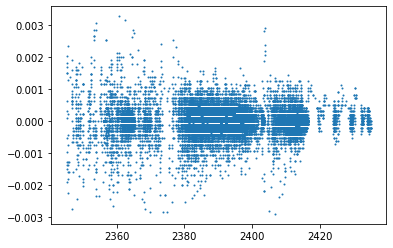

rolling_max


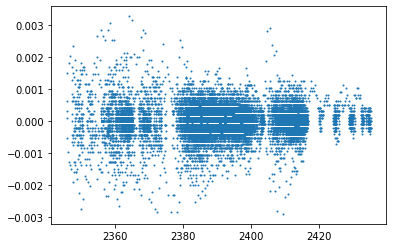

rolling_min


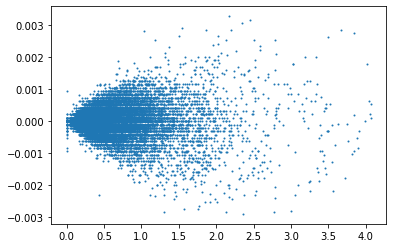

                      ret  rolling_max  rolling_min  10min_macd  30min_std  \
ret              1.000000    -0.001069    -0.000889   -0.001066  -0.014841   
rolling_max     -0.001069     1.000000     0.999976    0.999994  -0.022285   
rolling_min     -0.000889     0.999976     1.000000    0.999993  -0.027647   
10min_macd      -0.001066     0.999994     0.999993    1.000000  -0.024895   
30min_std       -0.014841    -0.022285    -0.027647   -0.024895   1.000000   
10min_direction  0.315325     0.002206     0.004839    0.003550  -0.386886   

                 10min_direction  
ret                     0.315325  
rolling_max             0.002206  
rolling_min             0.004839  
10min_macd              0.003550  
30min_std              -0.386886  
10min_direction         1.000000  


In [93]:
import matplotlib.pyplot as plt 
plt.scatter(Linear.predict(sm.add_constant(valid_x.sub(exp_mean).div(exp_std))), valid.ret, s = 1) # probably exist higher order term
plt.show() 

for i in range(1,len(valid_x.columns)): 
    print(valid_x.columns[i])
    
    plt.scatter(valid[valid.columns[i]], valid.ret, s = 1)
    plt.show()
    
print(df.corr()) # drop rolling_min

In [94]:
try:
    df = df.drop(columns = [ 'rolling_min'])
except: 
    pass
train,valid, test, trading = df.loc[:'2017-05-01'], df.loc['2017-05-01': '2017-06-01'], \
                            df.loc['2017-06-01':'2017-07-01'], df.loc['2017-07-01':]

train_x = train.drop('ret',axis = 1)

exp_mean = train_x.mean(axis = 0)
exp_std = train_x.std(axis = 0)
train_x = train_x.sub(exp_mean).div(exp_std)


# train
Linear = sm.OLS(exog = train_x, endog = train[['ret']]).fit()
Linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    ret   R-squared (uncentered):                   0.142
Model:                            OLS   Adj. R-squared (uncentered):              0.142
Method:                 Least Squares   F-statistic:                              7100.
Date:                Sat, 08 Jul 2023   Prob (F-statistic):                        0.00
Time:                        21:10:16   Log-Likelihood:                      1.1367e+06
No. Observations:              170934   AIC:                                 -2.273e+06
Df Residuals:                  170930   BIC:                                 -2.273e+06
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
rolling_max         0.0066      0.000     58.095      0.000       0.006       0.007
10min_macd         -0.0066      0.000    -58.140      0.000      -0.007      -0.006
30min_std        1.709e-05   1.13e-06     15.140      0.000    1.49e-05    1.93e-05
10min_direction     0.0001   8.34e-07    164.504      0.000       0.000       0.000
==============================================================================
Omnibus:                    60516.827   Durbin-Watson:                   0.285
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         24642348.695
Skew:                           0.238   Prob(JB):                         0.00
Kurtosis:                      61.819   Cond. No.                         301.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
test_x = test[['10min_direction', '10min_macd', '30min_std', 'rolling_max']]
test_x = test_x.sub(exp_mean).div(exp_std)

test_MSE = ((Linear.predict(test_x) - test.ret)**2).sum()/(len(test) - 2)
test_MSE

0.00030469420092557625